In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
import pandas as pd

In [4]:
files = map(np.load, glob.glob("../export/data/feature_data_10_*.npz"))

In [5]:
sessions = [ f["session_info"].tolist() for f in files ] 
sessions_id = [ int(s["sessionId"]) for s in sessions ]

signals = files[0]["signals"]
attributes = files[0]["attributes"]

In [6]:
# select which session to reject
# rejected_sid = [426,814]
# rejectd_index = [ sessions_id.index(i) for i in rejected_sid ]
# print rejectd_index

In [7]:
print sessions_id
print attributes
print signals

[10]
['mean' 'std' 'min' 'max' 'mean_diff' 'mean_abs_diff']
['ECG' 'EDA' 'Resp' 'SKT']


In [8]:
data = files[0]["valence"]
print signals
print attributes

['ECG' 'EDA' 'Resp' 'SKT']
['mean' 'std' 'min' 'max' 'mean_diff' 'mean_abs_diff']


In [9]:
data = pd.DataFrame(data.tolist())

In [10]:
data.head()

,ECG_max,ECG_mean,ECG_mean_abs_diff,ECG_mean_diff,ECG_min,ECG_std,EDA_max,EDA_mean,EDA_mean_abs_diff,EDA_mean_diff,...,Resp_mean_abs_diff,Resp_mean_diff,Resp_min,Resp_std,SKT_max,SKT_mean,SKT_mean_abs_diff,SKT_mean_diff,SKT_min,SKT_std
0,0.243366,0.026254,0.028304,-0.004462,0.0,0.067873,0.000798,0.000537,0.000035,-0.000002,...,0.022049,-0.000459,0.606216,0.079976,0.482488,0.442797,0.020837,0.008509,0.260361,0.039250
1,0.246932,0.028660,0.016597,-0.004254,0.0,0.065977,0.000882,0.000574,0.000038,-0.000002,...,0.022290,0.000043,0.838007,0.047331,0.482488,0.450828,0.011308,-0.001277,0.426610,0.009680
2,0.251740,0.031316,0.013203,-0.003972,0.0,0.061771,0.000959,0.000614,0.000022,-0.000002,...,0.022047,0.000671,0.819389,0.052879,0.460047,0.449768,0.009050,0.001323,0.426610,0.007241
3,0.255293,0.034244,0.012277,-0.003763,0.0,0.063548,0.001028,0.000638,0.000024,-0.000002,...,0.022141,0.001183,0.791675,0.058457,0.460047,0.450926,0.007711,-0.000246,0.436664,0.005444
4,0.260149,0.037421,0.010752,-0.003482,0.0,0.062045,0.001091,0.000664,0.000026,-0.000002,...,0.021791,0.001813,0.771126,0.067071,0.458115,0.450845,0.006856,0.000933,0.436664,0.005322


In [11]:
data_clean = data.fillna(data.median())
print data_clean.columns

Index([u'ECG_max', u'ECG_mean', u'ECG_mean_abs_diff', u'ECG_mean_diff',
       u'ECG_min', u'ECG_std', u'EDA_max', u'EDA_mean', u'EDA_mean_abs_diff',
       u'EDA_mean_diff', u'EDA_min', u'EDA_std', u'Resp_max', u'Resp_mean',
       u'Resp_mean_abs_diff', u'Resp_mean_diff', u'Resp_min', u'Resp_std',
       u'SKT_max', u'SKT_mean', u'SKT_mean_abs_diff', u'SKT_mean_diff',
       u'SKT_min', u'SKT_std'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4e574b9d0>,
      dtype=object)

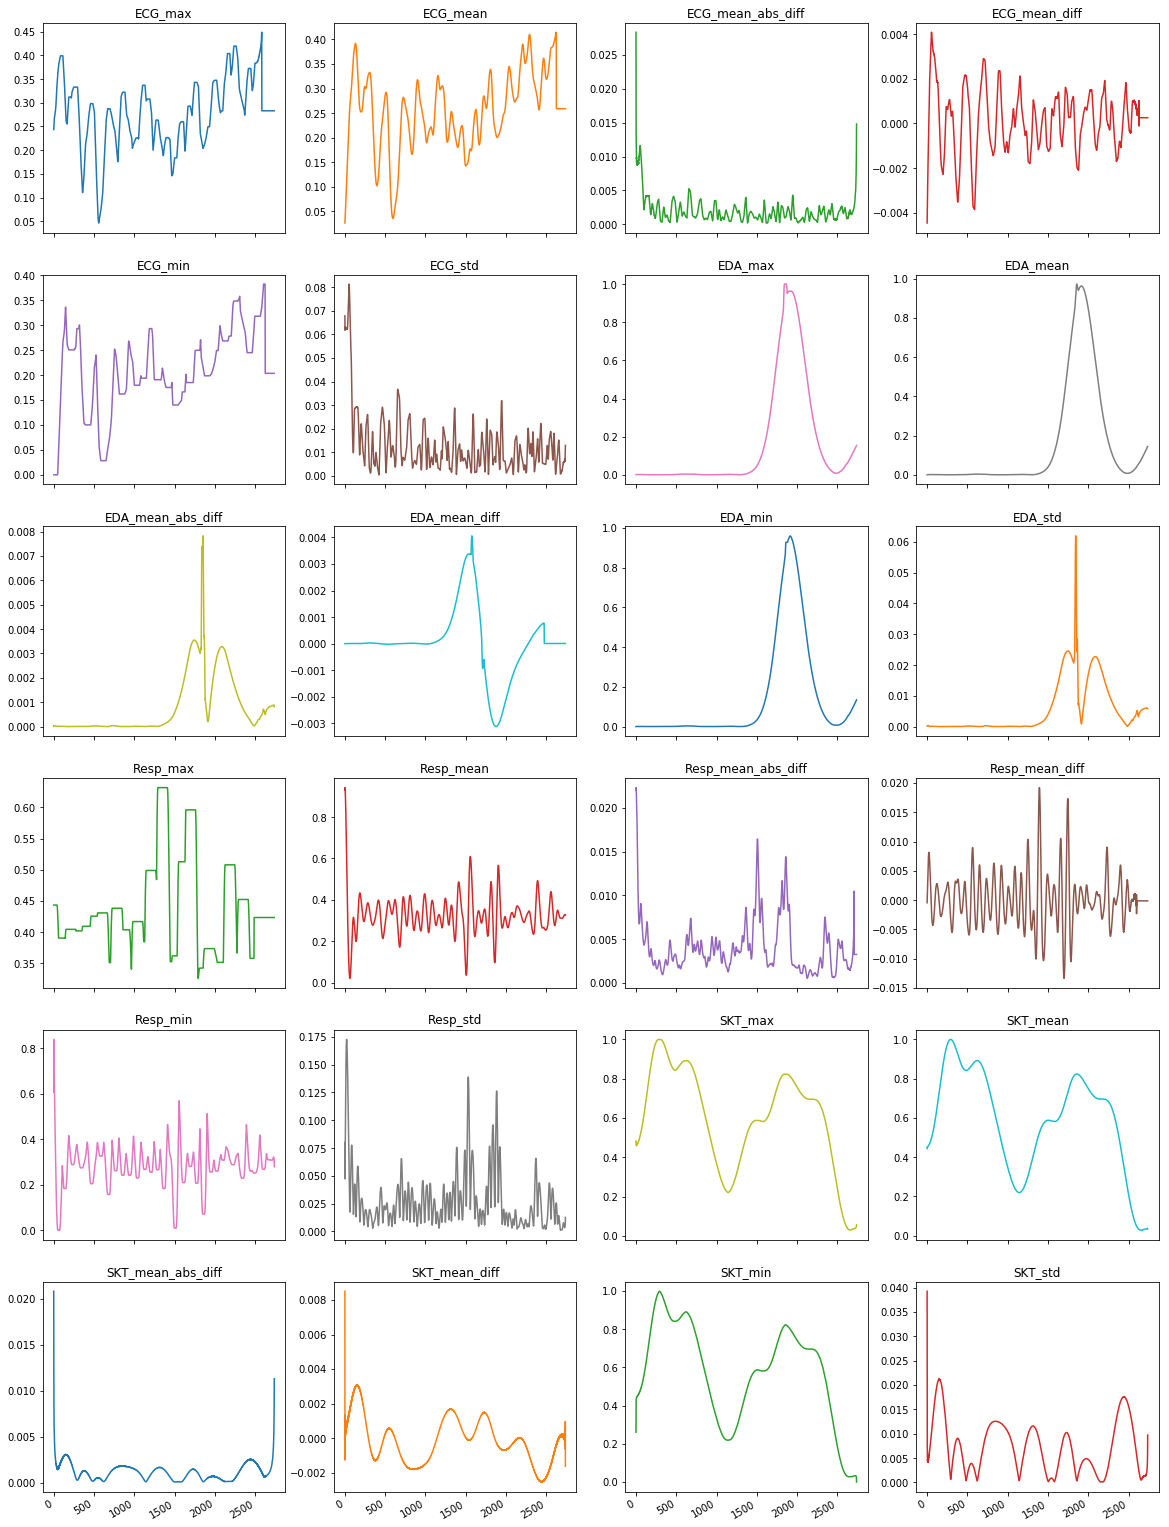

In [12]:
data_clean.plot(figsize=(20, 30), legend=False, subplots=True, layout=(6,4), title=data_clean.columns.tolist())